In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,cross_val_score,KFold
import matplotlib.pyplot as plt
import os 

chose_data = 'full_data_without_producID.csv'
#chose_data = 'significant_data_05.csv'


In [32]:
data = pd.read_csv(chose_data)
total_data =  len(data.index)
print('the number of sample:',total_data)

the number of sample: 180495


In [33]:
x_train,x_test,y_train,y_test = train_test_split(data.drop('Late_delivery_risk', axis = 1).values,data['Late_delivery_risk'].values,test_size = 0.5)

RandomFores

In [ ]:

from sklearn import preprocessing

x_train  = preprocessing.normalize(x_train)
x_test  = preprocessing.normalize(x_test)

In [36]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.01, n_estimators=100,
                       verbose=0, warm_start=True)
model = rf.fit(x_train, y_train)

mức độ quan trọng của feature: [1.71465941e-02 3.36821756e-04 3.24198785e-04 1.77240797e-03
 1.22219148e-03 3.41495678e-04 7.77021279e-04 2.07186653e-04
 3.98216003e-04 2.04923424e-04 4.38117982e-04 3.37230535e-04
 3.97184991e-04 3.17081433e-04 3.71057158e-03 5.03515810e-03
 5.90735347e-01 1.74954414e-04 3.67223083e-01 8.90021403e-03]
feature quan trọng nhất: time_delta


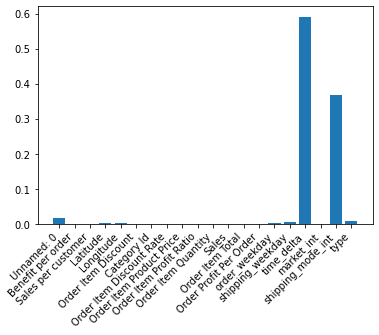

In [37]:
# biểu thị mức độ quan trọng của feature, cao nhất ứng vs quan trọng nhất 
print('mức độ quan trọng của feature:', rf.feature_importances_)
plt.bar(list(data.drop('Late_delivery_risk', axis = 1).keys()),rf.feature_importances_)
# Xoay trục x
plt.xticks(rotation=45, ha='right')
print('feature quan trọng nhất:', list(data.drop('Late_delivery_risk', axis = 1).keys())[np.argmax(rf.feature_importances_)])

In [38]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[35602  5042]
 [  733 48871]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.92     40644
           1       0.91      0.99      0.94     49604

    accuracy                           0.94     90248
   macro avg       0.94      0.93      0.93     90248
weighted avg       0.94      0.94      0.94     90248

0.9305851075881676


<Figure size 432x288 with 0 Axes>

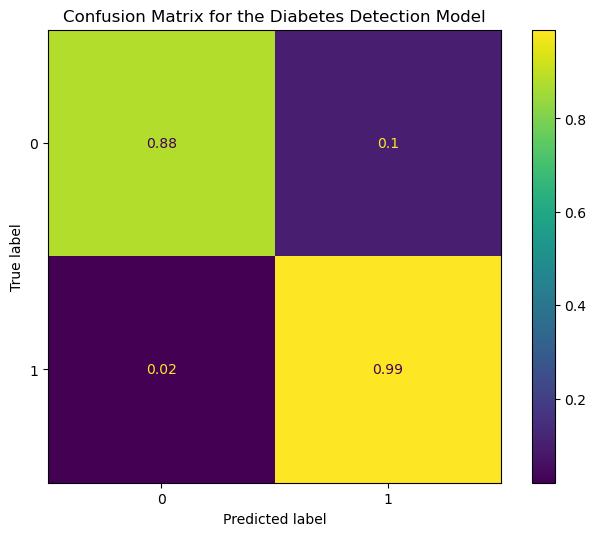

In [39]:
import numpy as np
#cm = np.asarray(cm)
cm = cm/cm.sum(axis=1)
for i in range(len(cm)):
    for j in range(len(cm)):
        cm[i][j] = round(cm[i][j],2)
        
plt.figure()
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)
fig.savefig('t.png')


In [5]:
xgb = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)
model = xgb.fit(x_train,y_train)

In [6]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[38349  2486]
 [ 1038 48375]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     40835
           1       0.95      0.98      0.96     49413

    accuracy                           0.96     90248
   macro avg       0.96      0.96      0.96     90248
weighted avg       0.96      0.96      0.96     90248

0.9590571172592066


mức độ quan trọng của feature: [0.00808422 0.00615439 0.00754168 0.04316903 0.05900481 0.00675029
 0.02291521 0.0071728  0.01126678 0.01116478 0.03777497 0.00720685
 0.01125628 0.01029957 0.02095488 0.03729627 0.25626642 0.02731467
 0.35600033 0.0524058 ]
feature quan trọng nhất: shipping_mode_int


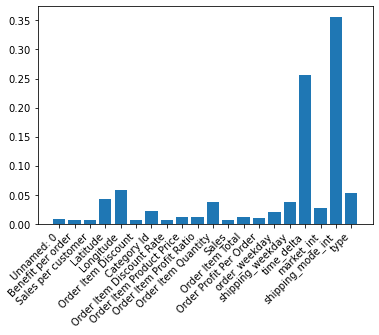

In [11]:
# biểu thị mức độ quan trọng của feature, cao nhất ứng vs quan trọng nhất 

print('mức độ quan trọng của feature:', xgb.feature_importances_)
plt.bar(list(data.drop('Late_delivery_risk', axis = 1).keys()),xgb.feature_importances_)
# Xoay trục x
plt.xticks(rotation=45, ha='right')
print('feature quan trọng nhất:', list(data.drop('Late_delivery_risk', axis = 1).keys())[np.argmax(xgb.feature_importances_)])

*logistic regression


In [35]:

from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(penalty='l1',solver='liblinear' )
lg.fit(x_train, y_train)
#clf.predict(X[:2, :])

#clf.predict_proba(X[:2, :])

y_pred = lg.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
#print(roc_auc_score(y_test,y_pred))
#model.score(x_train, y_train)


[[38484  2160]
 [ 2290 47314]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     40644
           1       0.96      0.95      0.96     49604

    accuracy                           0.95     90248
   macro avg       0.95      0.95      0.95     90248
weighted avg       0.95      0.95      0.95     90248



<AxesSubplot:title={'center':'Feature Importance'}>

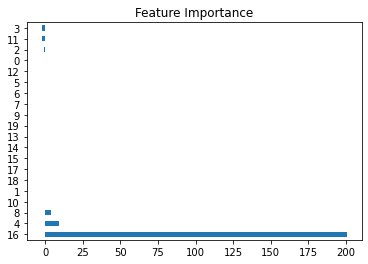

In [25]:
# biểu thị mức độ quan trọng của feature, cao nhất ứng vs quan trọng nhất 

importance = lg.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

*SVM

In [40]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model = clf.fit(x_train, y_train)
#clf.predict(X[:2, :])

#clf.predict_proba(X[:2, :])

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
model.score(x_test, y_test)


KeyboardInterrupt: 

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=3)  # Specify the number of neighbors (K)

# Train the classifier
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

from sklearn.metrics import accuracy_score
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
print(classification_report(y_test,y_pred))

Linear Discriminant Analysis (LDA)

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data in X (features) and y (labels)
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LDA classifier object
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
lda.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lda.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
#model.score(x_train, y_train)

Accuracy: 0.5839242974913571
[[38311  2508]
 [ 2295 47134]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     40819
           1       0.95      0.95      0.95     49429

    accuracy                           0.95     90248
   macro avg       0.95      0.95      0.95     90248
weighted avg       0.95      0.95      0.95     90248

0.9460638955927625
